Library Imports

In [2]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

Data Load

In [4]:
data = pd.read_csv("./Bakery.csv")

Data Pre-processing

In [5]:
# Add new attribute, Month, converting datetime to month
data["DateTime"] = pd.to_datetime(data["DateTime"])
data["Month"] = data['DateTime'].dt.month
data['Month'] = data['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

In [6]:
# Add new attribute, Month, converting datetime to weekday
data['Weekday'] = data['DateTime'].dt.weekday
data['Weekday'] = data['Weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

Data Exploration

In [7]:
data.columns

Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType', 'Month',
       'Weekday'],
      dtype='object')

In [8]:
data.shape

(20507, 7)

In [9]:
# All the bakery items
items = data["Items"].unique()
print(items)
print("Total: ",len(items))

['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbread sandwich' 'Extra

In [10]:
# Looking at frequent items and see which sells the most
itemFrequency = data["Items"].value_counts().sort_values(ascending=False)
itemFrequency = itemFrequency.head(20)
itemFrequency

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Items, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionNo  20507 non-null  int64         
 1   Items          20507 non-null  object        
 2   DateTime       20507 non-null  datetime64[ns]
 3   Daypart        20507 non-null  object        
 4   DayType        20507 non-null  object        
 5   Month          20507 non-null  object        
 6   Weekday        20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.1+ MB


In [12]:
data.describe(include=object)

,Items,Daypart,DayType,Month,Weekday
count,20507,20507,20507,20507,20507
unique,94,4,2,12,7
top,Coffee,Afternoon,Weekday,March,Saturday
freq,5471,11569,12807,3220,3554


In [13]:
data.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Month,Weekday
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,October,Sunday
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,October,Sunday
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,October,Sunday
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,October,Sunday
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,October,Sunday


In [14]:
# Check if there ae any null values or not
data.isnull().values.any()

False

In [15]:
# Total transactions
data["TransactionNo"].nunique()

9465

In [16]:
itemFrequency.head(20).index

Index(['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich', 'Medialuna',
       'Hot chocolate', 'Cookies', 'Brownie', 'Farm House', 'Muffin',
       'Alfajores', 'Juice', 'Soup', 'Scone', 'Toast', 'Scandinavian',
       'Truffles', 'Coke'],
      dtype='object')

Data Visualization

Text(0.5, 1.0, 'Top 20 Frequently Purchased Items')

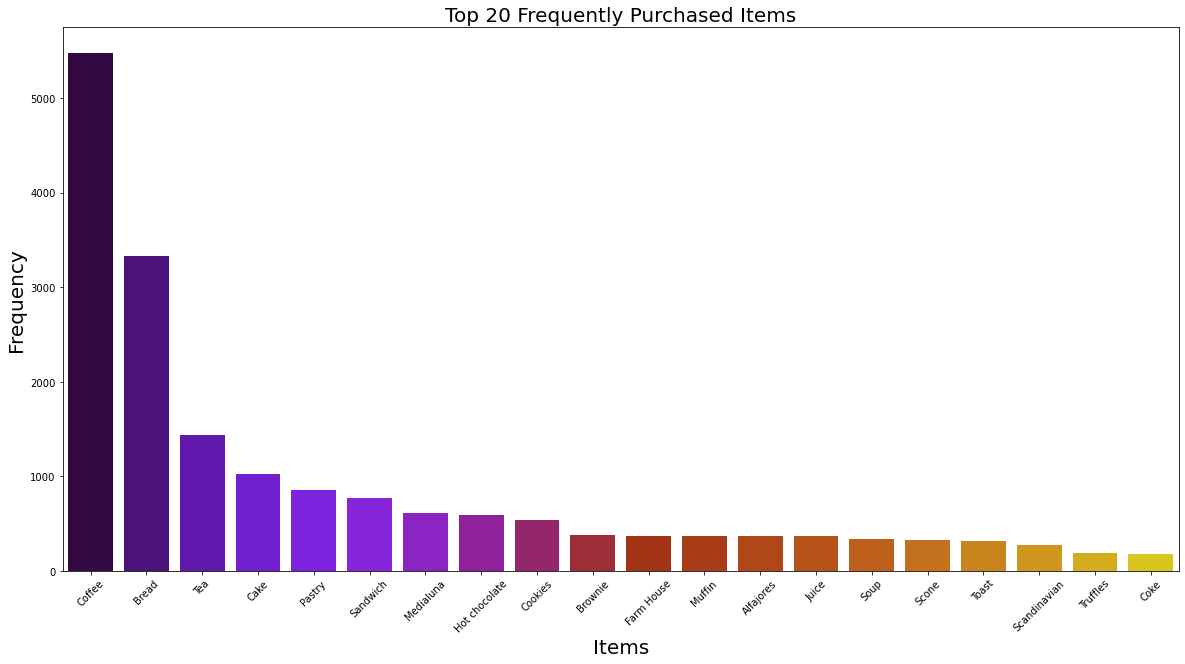

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(x=itemFrequency.index, y=itemFrequency, palette="gnuplot")
plt.xlabel("Items", size=20)
plt.xticks(rotation=45)
plt.ylabel("Frequency", size=20)
plt.title("Top 20 Frequently Purchased Items", size=20)


Text(0.5, 1.0, 'Number of orders per month')

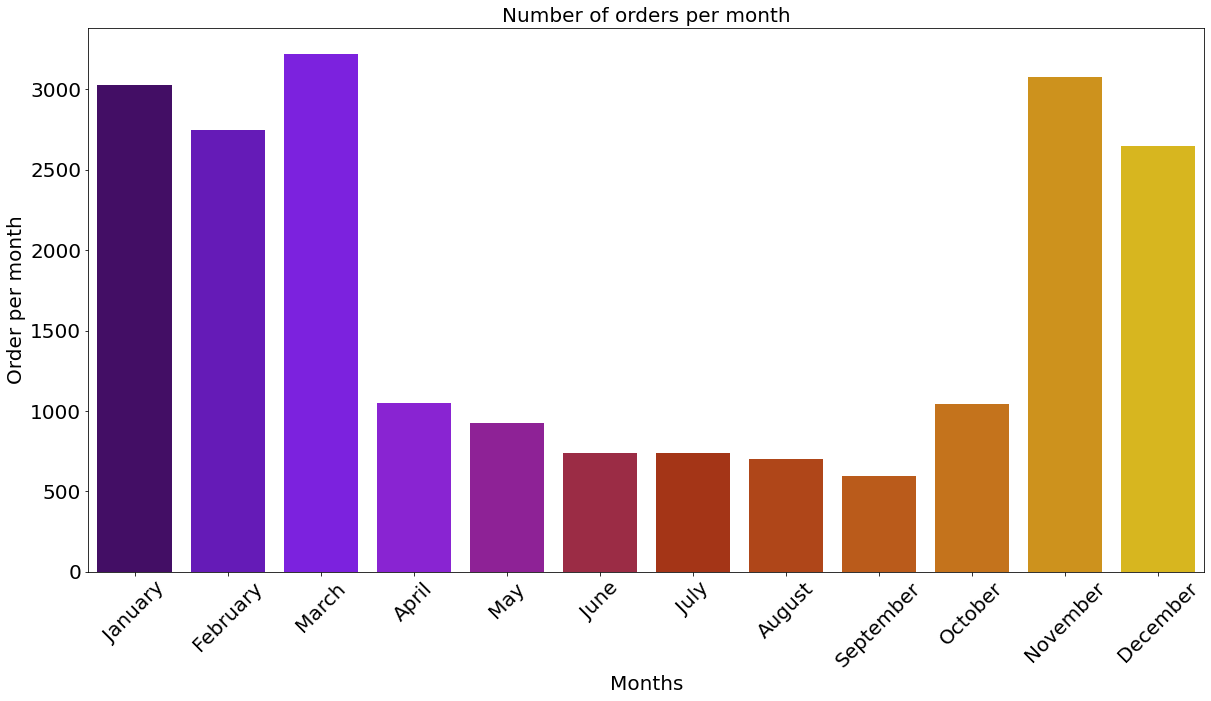

In [18]:
monthlyTransaction = data.groupby("Month")["TransactionNo"].count().reset_index()
monthlyTransaction.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthlyTransaction.sort_values("monthorder",inplace=True)

plt.figure(figsize=(20,10))
sns.barplot(x=monthlyTransaction["Month"], y=monthlyTransaction["TransactionNo"], palette="gnuplot")
plt.xlabel("Months", size=20)
plt.xticks(rotation=45, size=20)
plt.yticks(size=20)
plt.ylabel("Order per month", size=20)
plt.title("Number of orders per month", size=20)


In [19]:
# We have more transactions in Janurary, Feburary, March, November, December
# This is because those months are Winter season in UK and people probably drink
# coffee during this season

Text(0.5, 1.0, 'Number of orders per day')

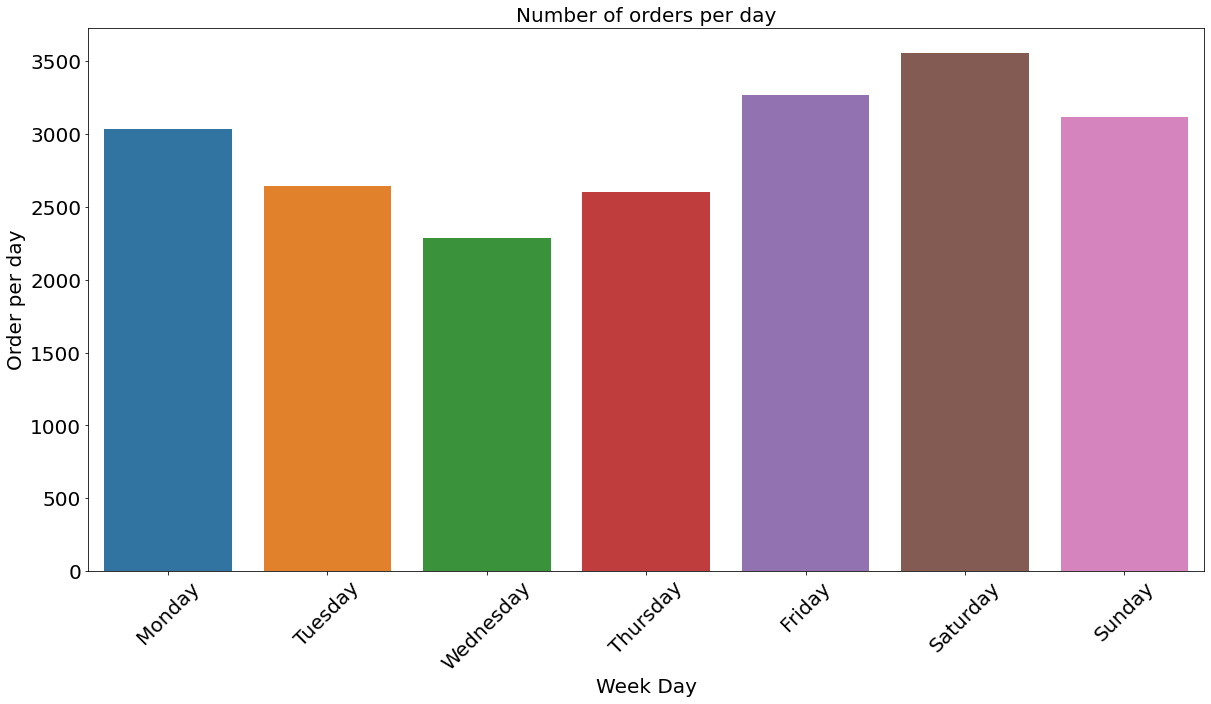

In [20]:
weeklyTransactions = data.groupby("Weekday")["TransactionNo"].count().reset_index()
weeklyTransactions.loc[:,"WeekdayOrder"] = [4,0,5,6,3,1,2]
weeklyTransactions.sort_values("WeekdayOrder",inplace=True)

plt.figure(figsize=(20,10))
sns.barplot(x=weeklyTransactions["Weekday"], y=weeklyTransactions["TransactionNo"])
plt.xlabel("Week Day", size=20)
plt.xticks(rotation=45, size=20)
plt.yticks(size=20)
plt.ylabel("Order per day", size=20)
plt.title("Number of orders per day", size=20)

In [21]:
dailyFrequentItem = data.groupby(["Daypart", "Items"])["TransactionNo"].count().reset_index()
dailyFrequentItem.sort_values(["Daypart", "TransactionNo"], ascending=False, inplace=True)
dailyFrequentItem

,Daypart,Items,TransactionNo
222,Night,Vegan Feast,7
217,Night,Hot chocolate,2
221,Night,Valentine's card,2
218,Night,Juice,1
219,Night,Mineral water,1
...,...,...,...
41,Afternoon,Hack the stack,1
55,Afternoon,Mortimer,1
60,Afternoon,Olum & polenta,1
64,Afternoon,Polenta,1


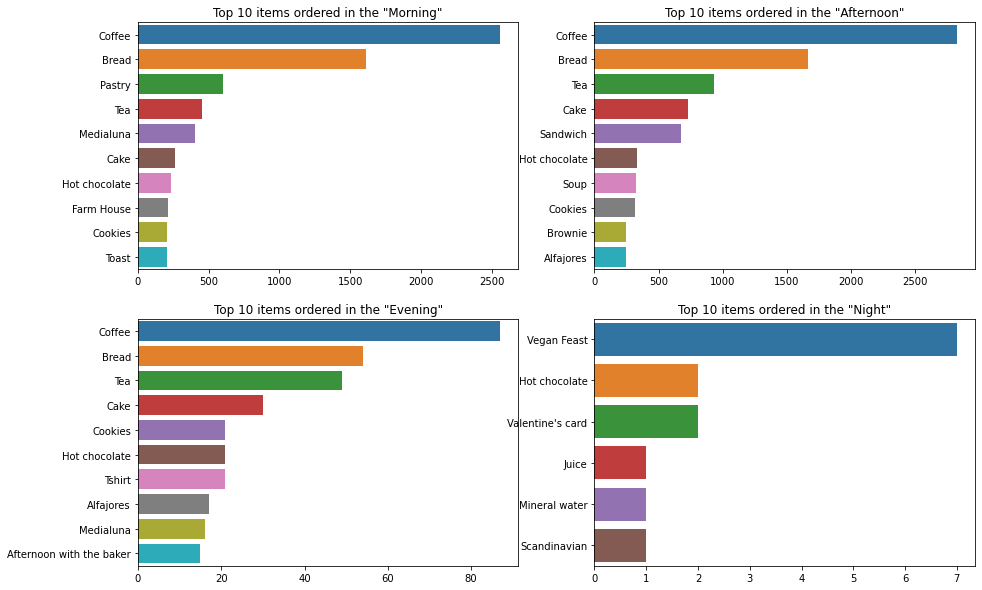

In [22]:
day = ["Morning", "Afternoon", "Evening", "Night"]

plt.figure(figsize=(15,10))

for i, day in enumerate(day):
    plt.subplot(2,2,i+1)
    dayData = dailyFrequentItem[dailyFrequentItem["Daypart"] == day].head(10)
    sns.barplot(x=dayData["TransactionNo"],y=dayData["Items"])
    plt.xlabel("")
    plt.ylabel("")
    plt.title('Top 10 items ordered in the "{}"'.format(day))
plt.show()

Apriori Algorithm

In [4]:
import pandas as pd
from tabulate import tabulate

# Preprocessing the data
def create_transactions(data):
    grouped = data.groupby("TransactionNo")["Items"].apply(list)
    return [set(items) for items in grouped]

# Generate initial itemsets from transactions
def create_itemsets(transactions):
    itemsets = set()
    for transaction in transactions:
        for item in transaction:
            itemsets.add(frozenset([item]))
    return itemsets

# Calculate support for an itemset
def get_support(itemset, transactions):
    count = 0
    for transaction in transactions:
        if itemset.issubset(transaction):
            count += 1
    return count / len(transactions)

# Generate frequent itemsets
def get_frequent_itemsets(transactions, itemsets, min_support):
    frequent_itemsets = set()
    for itemset in itemsets:
        support = get_support(itemset, transactions)
        if support >= min_support:
            frequent_itemsets.add((itemset, support))
    return frequent_itemsets

# Generate new itemsets for next iteration
def apriori_gen(itemsets):
    new_itemsets = set()
    for itemset1 in itemsets:
        for itemset2 in itemsets:
            union_set = itemset1.union(itemset2)
            if len(union_set) == len(itemset1) + 1:
                new_itemsets.add(union_set)
    return new_itemsets

# Generate rules from frequent itemsets
def generate_rules(frequent_itemsets, transactions, min_confidence):
    rules = []
    for itemset, support in frequent_itemsets:
        for item in itemset:
            base = itemset - frozenset([item])
            if base:
                base_support = get_support(base, transactions)
                confidence = support / base_support
                if confidence >= min_confidence:
                    added_support = get_support(frozenset([item]), transactions)
                    lift = confidence / added_support
                    rules.append((base, frozenset([item]), support, confidence, lift))
    return rules

# Main Apriori algorithm
def apriori(data, min_support, min_confidence):
    transactions = create_transactions(data)
    itemsets = create_itemsets(transactions)
    all_frequent_itemsets = set()

    while itemsets:
        frequent_itemsets = get_frequent_itemsets(transactions, itemsets, min_support)
        all_frequent_itemsets = all_frequent_itemsets.union(frequent_itemsets)
        itemsets = apriori_gen({i for i, _ in frequent_itemsets})

    rules = generate_rules(all_frequent_itemsets, transactions, min_confidence)
    return rules

# Example usage
data = pd.read_csv("./Bakery.csv")  # Load your data here
rules = apriori(data, min_support=0.005, min_confidence=0.5)

# Prepare data for tabulation
table_data = []
for base, add, support, confidence, lift in rules:
    table_data.append([set(base), set(add), round(support, 4), round(confidence, 4), round(lift, 4)])
    
table_data.sort(key=lambda x: x[4], reverse=True)

# Display the rules in a table
print(tabulate(table_data, headers=["Antecedents", "Consequents", "Support", "Confidence", "Lift"], tablefmt="github"))


| Antecedents               | Consequents   |   Support |   Confidence |   Lift |
|---------------------------|---------------|-----------|--------------|--------|
| {'Keeping It Local'}      | {'Coffee'}    |    0.0054 |       0.8095 | 1.6922 |
| {'Toast'}                 | {'Coffee'}    |    0.0237 |       0.7044 | 1.4724 |
| {'Salad'}                 | {'Coffee'}    |    0.0066 |       0.6263 | 1.3091 |
| {'Cake', 'Hot chocolate'} | {'Coffee'}    |    0.0069 |       0.6019 | 1.2581 |
| {'Spanish Brunch'}        | {'Coffee'}    |    0.0109 |       0.5988 | 1.2518 |
| {'Medialuna'}             | {'Coffee'}    |    0.0352 |       0.5692 | 1.1899 |
| {'Pastry'}                | {'Coffee'}    |    0.0475 |       0.5521 | 1.1542 |
| {'Tiffin'}                | {'Coffee'}    |    0.0085 |       0.5479 | 1.1454 |
| {'Alfajores'}             | {'Coffee'}    |    0.0197 |       0.5407 | 1.1302 |
| {'Hearty & Seasonal'}     | {'Coffee'}    |    0.0057 |       0.54   | 1.1288 |
| {'Juice'}     